In [12]:
import torch
import torch.nn as nn
import numpy as np
from gensim.models import KeyedVectors
from main import run

In [13]:
def load_glove_embeddings(file_path, word_to_index, embedding_dim):
    embeddings = {}
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings[word] = coefs

    num_words = len(word_to_index)+1  # add 1 for the padding token
    embedding_matrix = np.zeros((num_words, embedding_dim))

    for word, index in word_to_index.items():
        if (embedding := embeddings.get(word)) is not None:
            embedding_matrix[index] = embedding
        else:
            embedding_matrix[index] = embeddings.get("<unk>", np.zeros(embedding_dim))

    return embedding_matrix

In [14]:
def load_word2vec_embeddings(file_path, word_to_index, embedding_dim):
    model = KeyedVectors.load_word2vec_format(file_path, binary=True)
    embedding_matrix = np.zeros((len(word_to_index) + 1, embedding_dim))

    for word, index in word_to_index.items():
        embedding_matrix[index] = model[word] if word in model else np.zeros(embedding_dim)

    return embedding_matrix

In [15]:
def load_fasttext_embeddings(embedding_file, word_index, embedding_dim):
    embeddings_index = {}
    with open(embedding_file, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [16]:
class Rnn(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Rnn, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.rnn(x)
        output = self.fc(output)
        return output

In [17]:
class Lstm(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Lstm, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)
        return output

In [18]:
class Gru(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Gru, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.gru = nn.GRU(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.gru(x)
        output = self.fc(output)
        return output

Epoch: 15/15
Validation Loss: 0.0725
Validation Macro F1: 0.7142
Training Macro F1: 0.7832


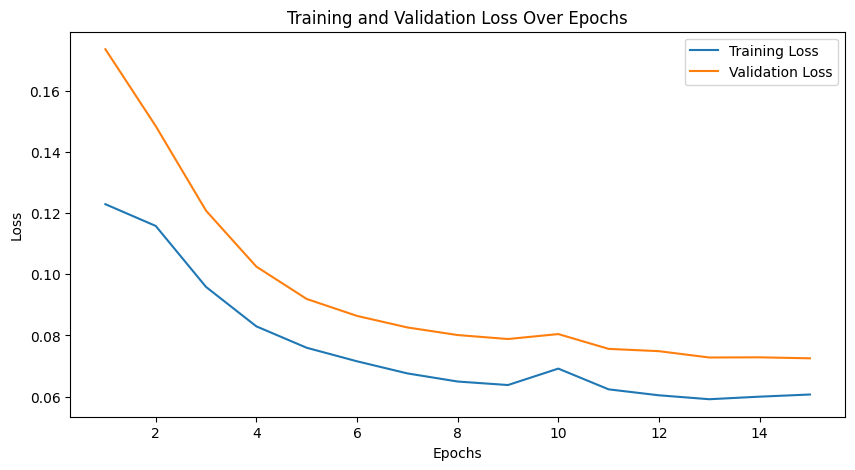

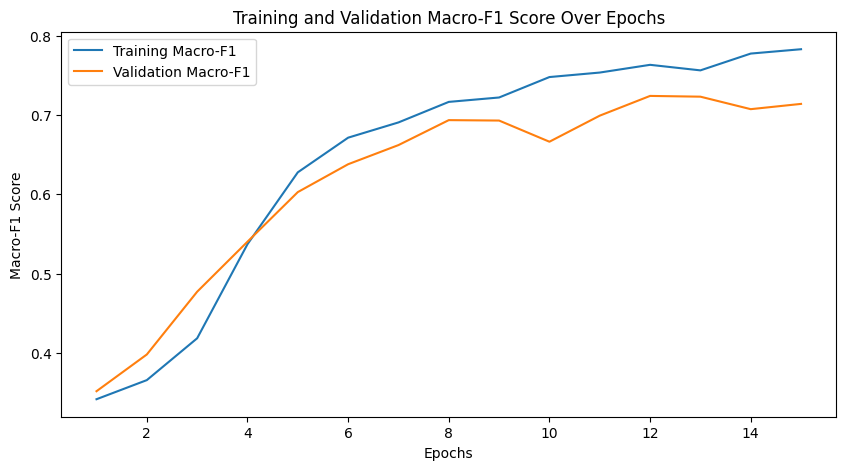

Final Test Accuracy: 0.9694
Final Test Macro F1: 0.6841
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.97      1.00      0.99     14774
           B       0.76      0.46      0.57       463
           I       0.76      0.37      0.50       243

    accuracy                           0.97     15480
   macro avg       0.83      0.61      0.68     15480
weighted avg       0.97      0.97      0.96     15480



In [19]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Rnn, "rnn_glove",15)

Epoch: 15/15
Validation Loss: 0.0717
Validation Macro F1: 0.7226
Training Macro F1: 0.7983


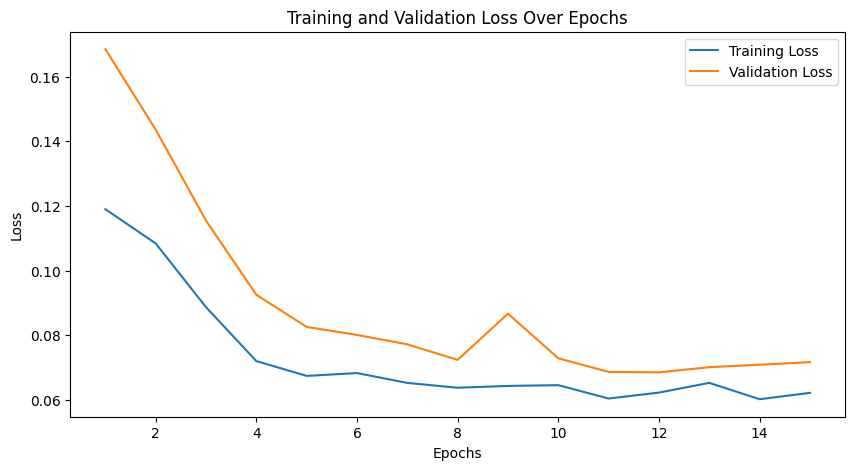

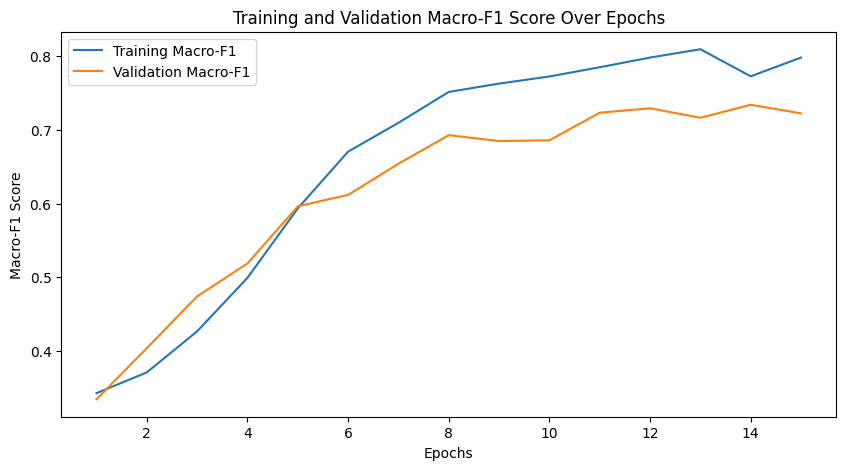

Final Test Accuracy: 0.9716
Final Test Macro F1: 0.6862
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      1.00      0.99     14774
           B       0.79      0.51      0.62       463
           I       0.82      0.31      0.45       243

    accuracy                           0.97     15480
   macro avg       0.86      0.61      0.69     15480
weighted avg       0.97      0.97      0.97     15480



In [20]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Rnn, "rnn_word2vec",15)

Epoch: 15/15
Validation Loss: 0.0654
Validation Macro F1: 0.7169
Training Macro F1: 0.8182


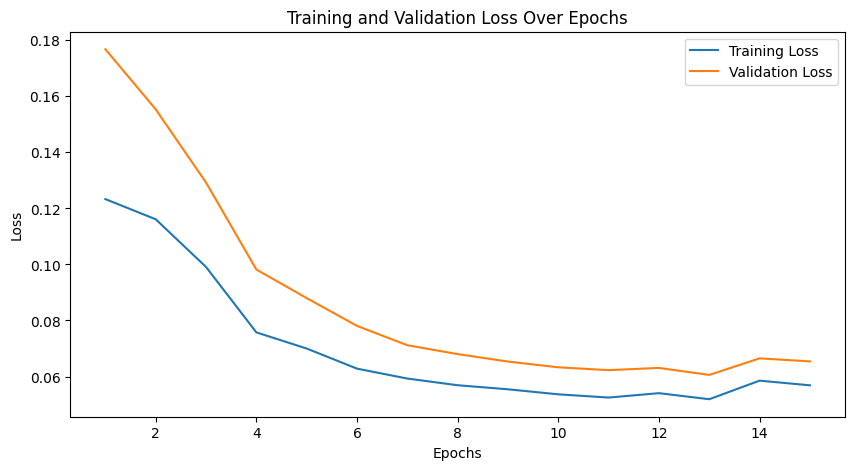

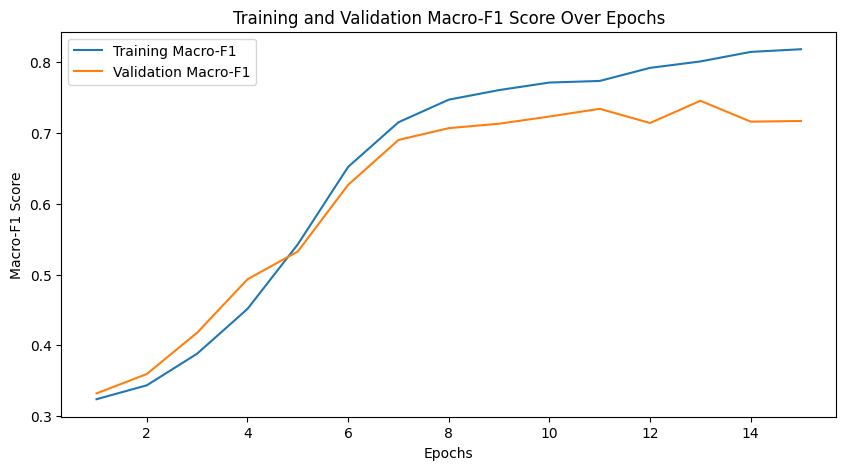

Final Test Accuracy: 0.9715
Final Test Macro F1: 0.6975
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.97      1.00      0.99     14774
           B       0.83      0.48      0.61       463
           I       0.86      0.35      0.50       243

    accuracy                           0.97     15480
   macro avg       0.89      0.61      0.70     15480
weighted avg       0.97      0.97      0.97     15480



In [21]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Rnn, "rnn_fasttext",15)

Epoch: 15/15
Validation Loss: 0.0764
Validation Macro F1: 0.7127
Training Macro F1: 0.7917


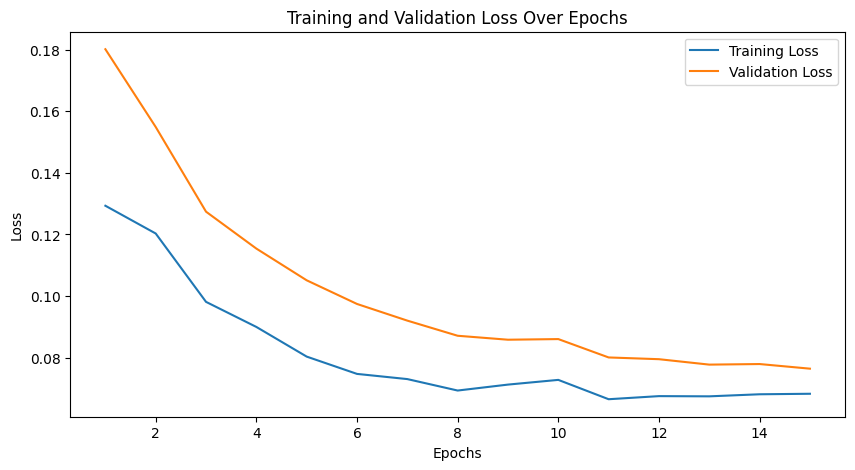

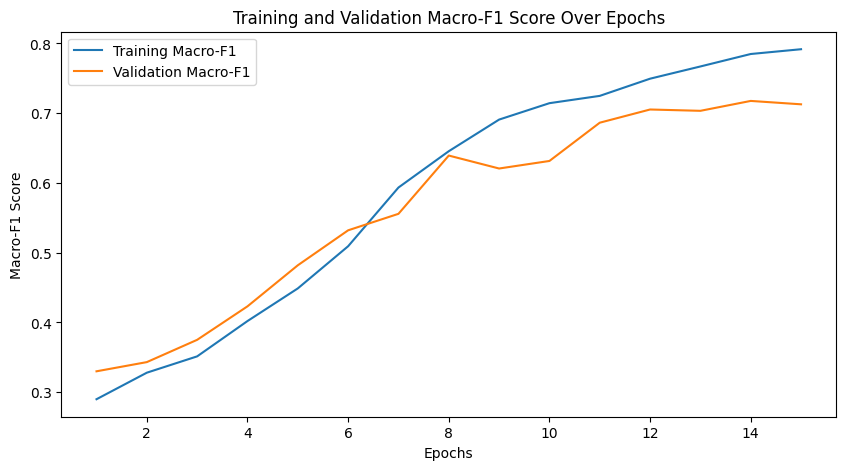

Final Test Accuracy: 0.9675
Final Test Macro F1: 0.6550
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.97      1.00      0.98     14774
           B       0.73      0.43      0.54       463
           I       0.72      0.32      0.44       243

    accuracy                           0.97     15480
   macro avg       0.81      0.58      0.65     15480
weighted avg       0.96      0.97      0.96     15480



In [22]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Lstm, "lstm_glove",15)

Epoch: 15/15
Validation Loss: 0.0702
Validation Macro F1: 0.7321
Training Macro F1: 0.8034


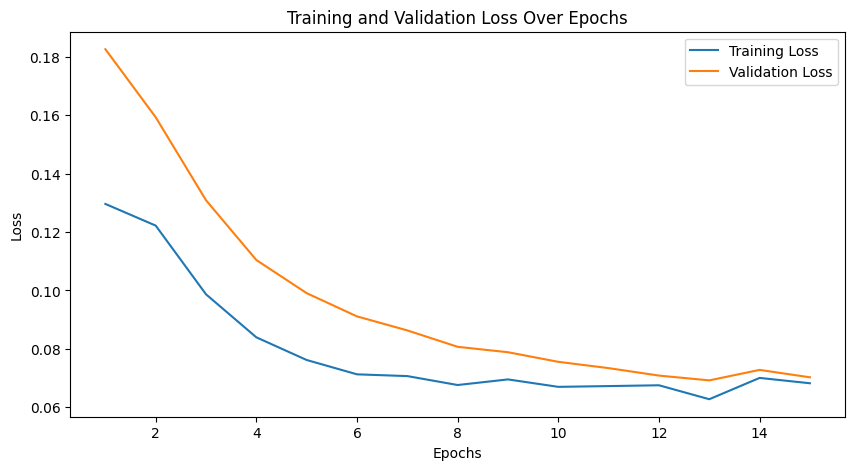

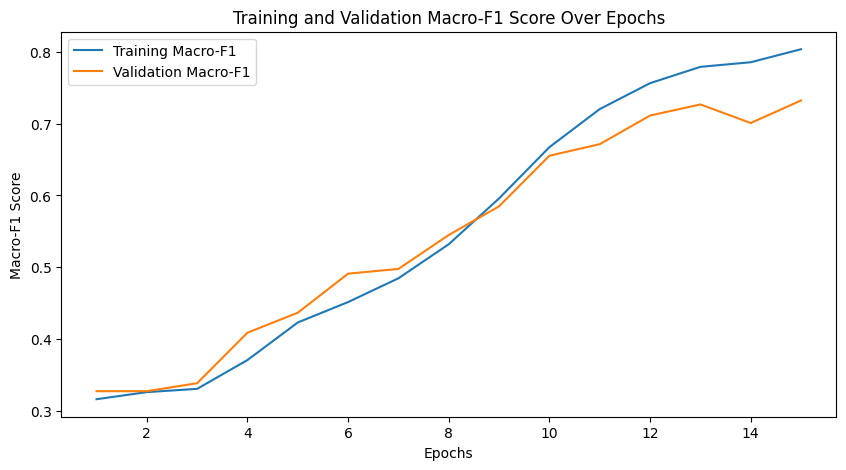

Final Test Accuracy: 0.9720
Final Test Macro F1: 0.6916
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      1.00      0.99     14774
           B       0.75      0.54      0.63       463
           I       0.87      0.31      0.46       243

    accuracy                           0.97     15480
   macro avg       0.87      0.62      0.69     15480
weighted avg       0.97      0.97      0.97     15480



In [23]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Lstm, "lstm_word2vec",15)

Epoch: 15/15
Validation Loss: 0.0624
Validation Macro F1: 0.7629
Training Macro F1: 0.7907


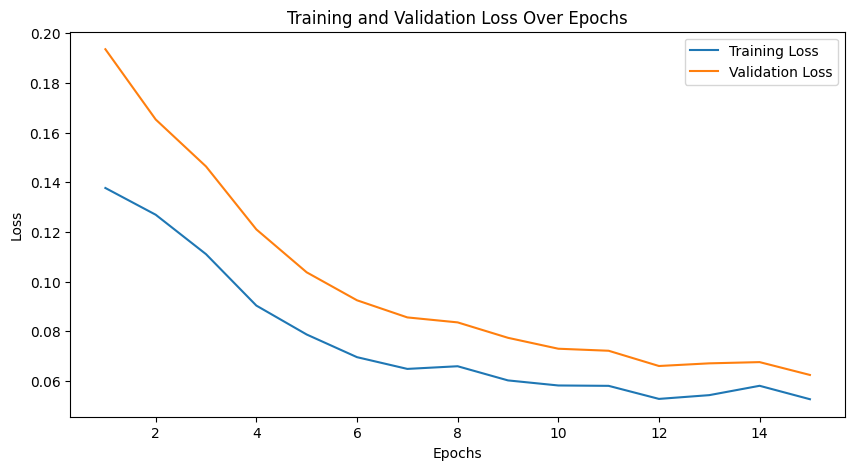

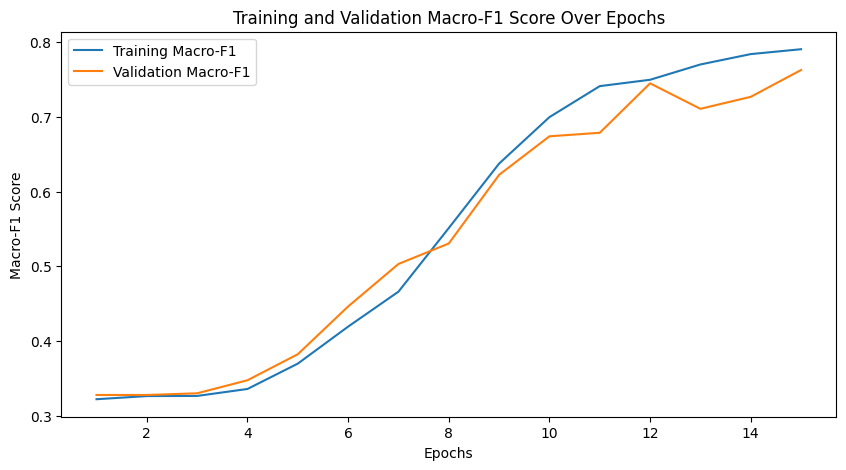

Final Test Accuracy: 0.9725
Final Test Macro F1: 0.7209
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      1.00      0.99     14774
           B       0.78      0.55      0.64       463
           I       0.83      0.39      0.53       243

    accuracy                           0.97     15480
   macro avg       0.86      0.64      0.72     15480
weighted avg       0.97      0.97      0.97     15480



In [24]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Lstm, "lstm_fasttext",15)

Epoch: 15/15
Validation Loss: 0.0722
Validation Macro F1: 0.7278
Training Macro F1: 0.8113


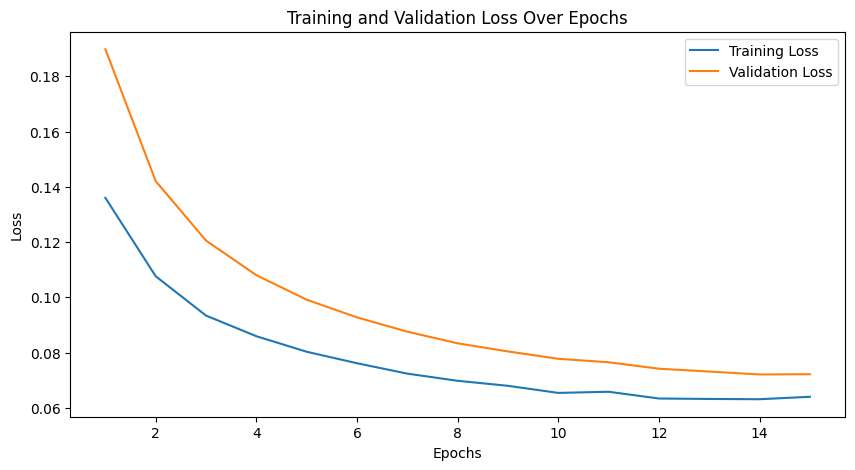

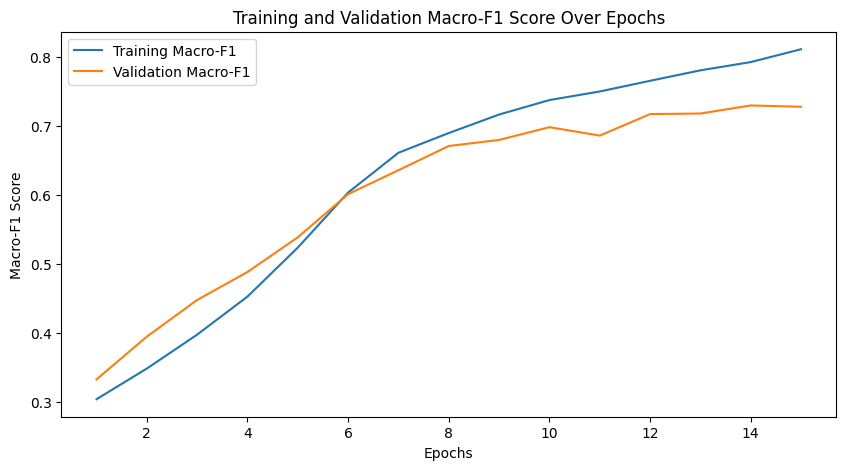

Final Test Accuracy: 0.9692
Final Test Macro F1: 0.6744
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.97      1.00      0.98     14774
           B       0.75      0.45      0.56       463
           I       0.82      0.33      0.47       243

    accuracy                           0.97     15480
   macro avg       0.85      0.59      0.67     15480
weighted avg       0.97      0.97      0.96     15480



In [25]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Gru, "gru_glove",15)

Epoch: 15/15
Validation Loss: 0.0675
Validation Macro F1: 0.7467
Training Macro F1: 0.8071


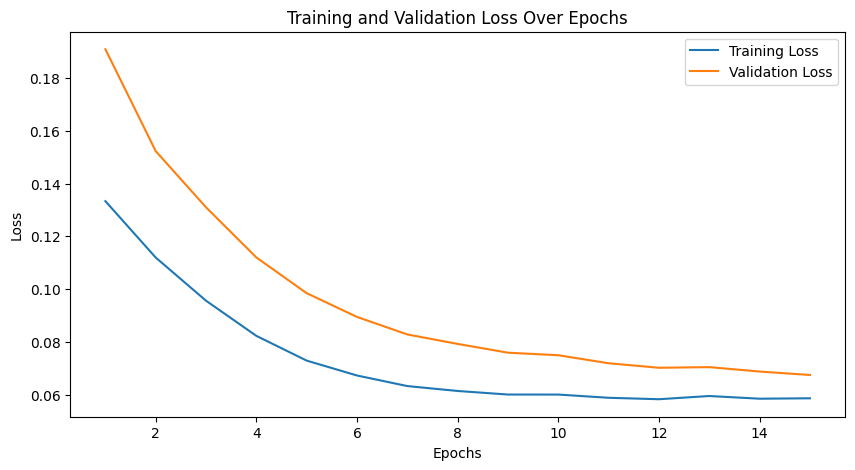

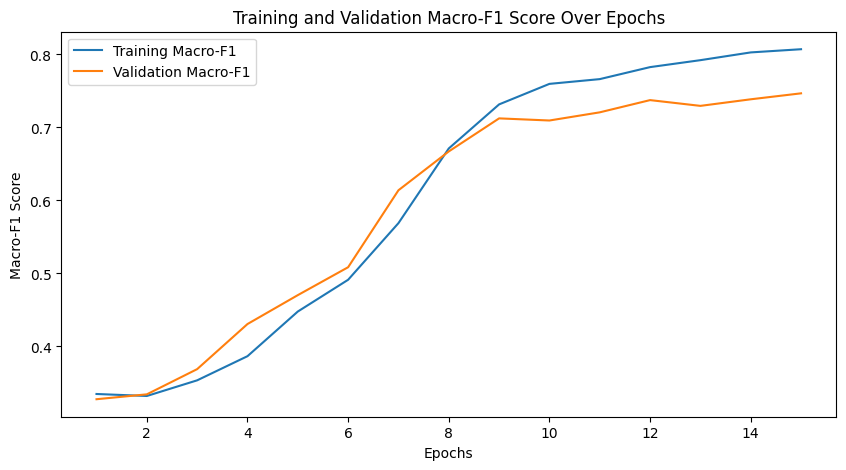

Final Test Accuracy: 0.9741
Final Test Macro F1: 0.7323
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      1.00      0.99     14774
           B       0.76      0.59      0.67       463
           I       0.82      0.41      0.54       243

    accuracy                           0.97     15480
   macro avg       0.85      0.66      0.73     15480
weighted avg       0.97      0.97      0.97     15480



In [26]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Gru, "gru_word2vec", 15)

Epoch: 15/15
Validation Loss: 0.0598
Validation Macro F1: 0.7656
Training Macro F1: 0.8158


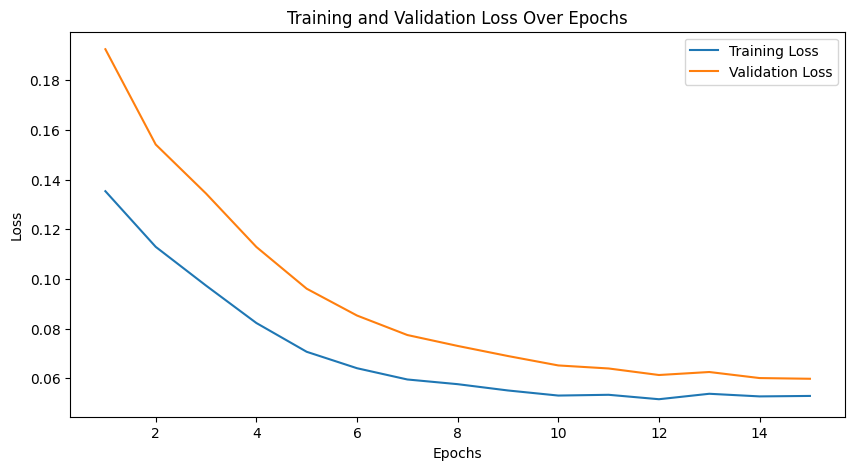

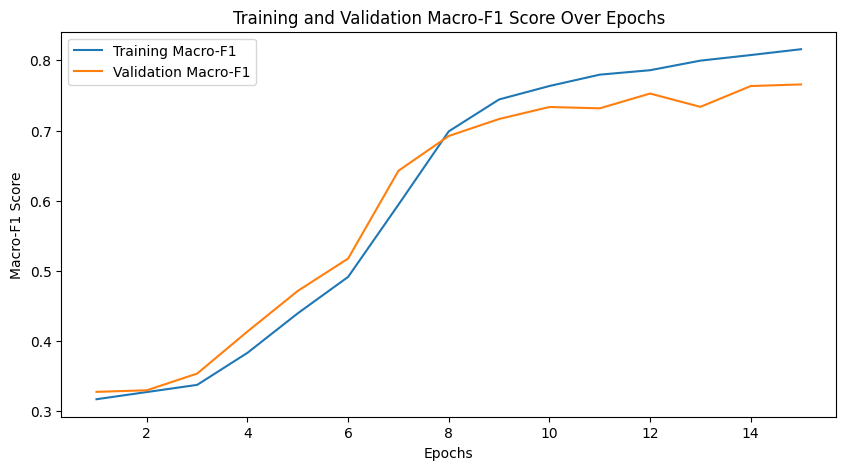

Final Test Accuracy: 0.9742
Final Test Macro F1: 0.7465
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.98      1.00      0.99     14774
           B       0.80      0.58      0.67       463
           I       0.84      0.44      0.58       243

    accuracy                           0.97     15480
   macro avg       0.87      0.67      0.75     15480
weighted avg       0.97      0.97      0.97     15480



In [27]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Gru, "gru_fasttext",15)